## Create the figures used in Stochastic Variance Reduced Gradient Plug-and-Play Methods for Solving Image Reconnstruction Problems (ICIP 2021)

In [1]:
%matplotlib inline 

# from imports import *
import torch
import matplotlib.pyplot as plt
import numpy as np
from algorithms import *
from Utilities import display_results
import sys
sys.path.append('problems/')
sys.path.append('denoisers/')

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [2]:
from problems.CSMRI import CSMRI
from denoisers.BM3D import BM3DDenoiser

# Figures 1: Compare Image Fidelity for Different Algorithms 

In [3]:
im_height, im_width = 128, 128  # Image dimensions
samp_rate = 0.5                 # Pick a number 0 < SR <= 1
# sigma_true = 5.0                # Select std dev of AWGN
snr = 10.

main_problem = CSMRI('./data/13.png', H=im_height, W=im_width, sample_prob=samp_rate, snr=snr)

0.1698022161338256
0.0 1.0


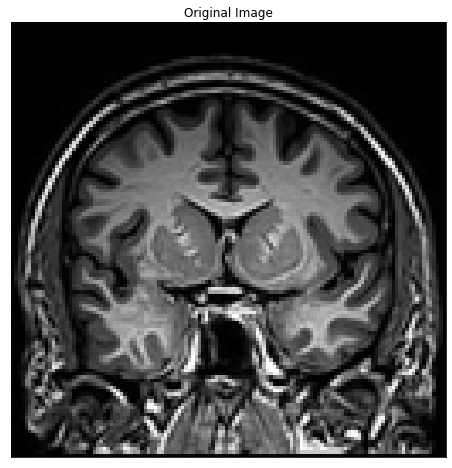

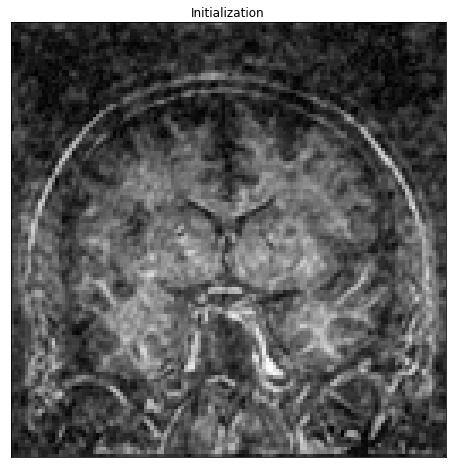

In [4]:
main_problem.display(show_measurements=False, save_results=True)
print(main_problem.sigma)
print(main_problem.Xinit.min(), main_problem.Xinit.max())

In [5]:
denoiser = BM3DDenoiser(sigma_modifier=0.7)
results_svrg = pnp_svrg(main_problem, denoiser=denoiser, eta=1e-1, tt=60, T2=10, mini_batch_size=500, verbose=True)

0 0 Before denoising:  17.468716248857152
After denoising update: 0 0 17.532327227487595
0 1 Before denoising:  17.903246914699118
After denoising update: 0 1 17.91304587563956
0 2 Before denoising:  18.26076934381497
After denoising update: 0 2 18.267471176504316
0 3 Before denoising:  18.608142015598503
After denoising update: 0 3 18.611861326958934
0 4 Before denoising:  15.243853817341158
After denoising update: 0 4 15.245941254138863
0 5 Before denoising:  15.580115915778826
After denoising update: 0 5 15.585852936223697
0 6 Before denoising:  15.777304444150374
After denoising update: 0 6 15.779369837725891
0 7 Before denoising:  16.135731998881457
After denoising update: 0 7 16.138768603782452
0 8 Before denoising:  16.48482972831031
After denoising update: 0 8 16.486880064053835
0 9 Before denoising:  16.826902989997002
After denoising update: 0 9 16.83063598121818
1 0 Before denoising:  17.33317292835293
After denoising update: 1 0 17.31907379925054
1 1 Before denoising:  17.8

Output PSNR: 22.8	Change in PSNR: 7.29	Gradient Time: 52.75	Denoising Time: 52.75


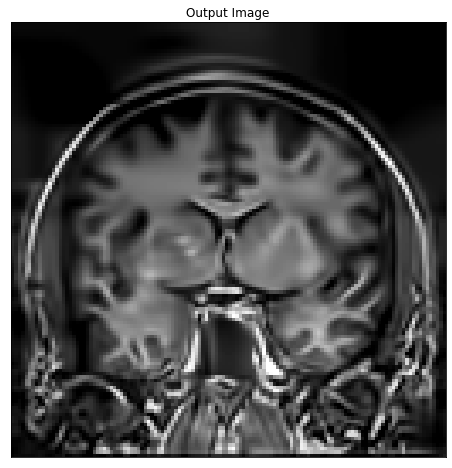

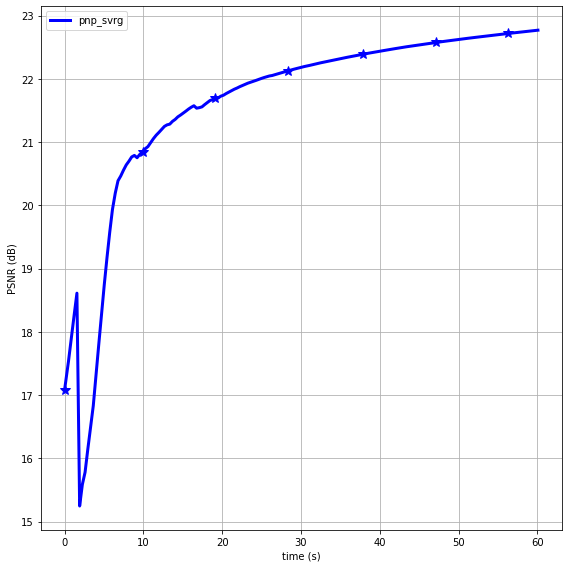

In [6]:
master_psnr_fig = display_results(main_problem, results_svrg, save_results=True)

In [10]:
denoiser = BM3DDenoiser(sigma_modifier=0.6)
results_sgd = pnp_sgd(main_problem, denoiser=denoiser, eta=1e-1, tt=60, mini_batch_size=1000, verbose=True)

0 Before denoising:  18.016463334504728
0 After denoising:  18.079622906184262
1 Before denoising:  18.17527503774478
1 After denoising:  18.191943942673312
2 Before denoising:  18.76383229106592
2 After denoising:  18.771679476315697
3 Before denoising:  18.901458995009207
3 After denoising:  18.903793380142314
4 Before denoising:  19.030371295870225
4 After denoising:  19.031113671854293
5 Before denoising:  19.128311744322207
5 After denoising:  19.127008299661185
6 Before denoising:  19.381186297790023
6 After denoising:  19.378685523516953
7 Before denoising:  19.46543857410146
7 After denoising:  19.461577141368412
8 Before denoising:  19.954365705320136
8 After denoising:  19.948901234659445
9 Before denoising:  20.055000605426557
9 After denoising:  20.048558913580763
10 Before denoising:  20.156127985826405
10 After denoising:  20.1490229475324
11 Before denoising:  20.230588296734805
11 After denoising:  20.220709219955427
12 Before denoising:  20.338468414075933
12 After den

Output PSNR: 23.3	Change in PSNR: 7.57	Gradient Time: 52.56	Denoising Time: 52.56


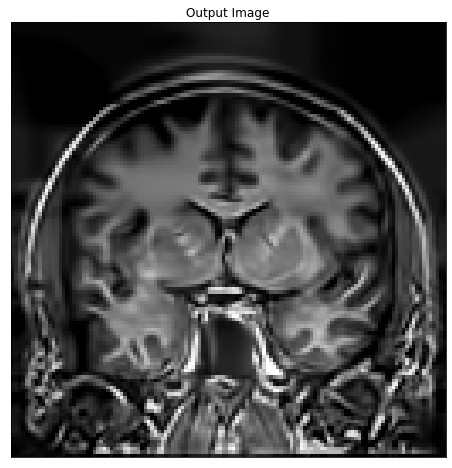

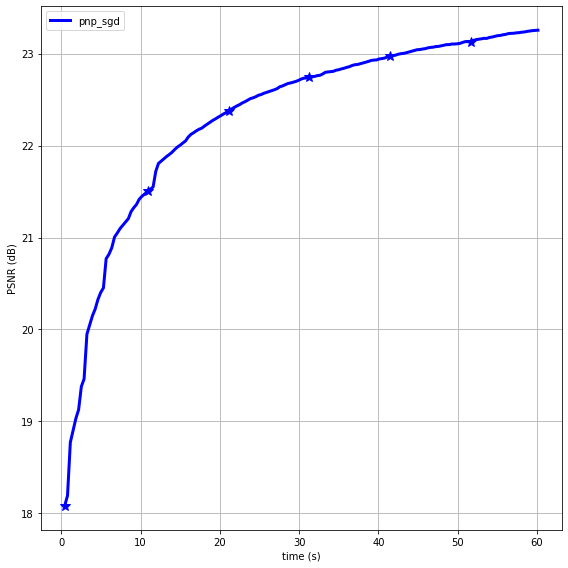

In [11]:
master_psnr_fig = display_results(main_problem, results_sgd, save_results=True)

In [7]:
denoiser = BM3DDenoiser(sigma_modifier=0.6)
results_gd = pnp_gd(main_problem, denoiser=denoiser, eta=1e-1, tt=60, verbose=True)

0 Before denoising:  17.468716248857152
0 After denoising:  17.522485830000207
1 Before denoising:  17.87544943759383
1 After denoising:  17.88457956981951
2 Before denoising:  18.209996793549177
2 After denoising:  18.206640200487396
3 Before denoising:  18.506087928383582
3 After denoising:  18.496185623698963
4 Before denoising:  18.771478659887244
4 After denoising:  18.757280302834616
5 Before denoising:  19.010289916152715
5 After denoising:  18.992830065065228
6 Before denoising:  19.22560533285334
6 After denoising:  19.205218993318027
7 Before denoising:  19.41971316216517
7 After denoising:  19.39717931377857
8 Before denoising:  19.595233085907786
8 After denoising:  19.570550066982005
9 Before denoising:  19.753925256967534
9 After denoising:  19.727308373490594
10 Before denoising:  19.897640471442102
10 After denoising:  19.869322118809098
11 Before denoising:  20.028108332774224
11 After denoising:  19.998397593866514
12 Before denoising:  20.146943099354296
12 After den

Output PSNR: 22.9	Change in PSNR: 0.23	Gradient Time: 59.84	Denoising Time: 59.84


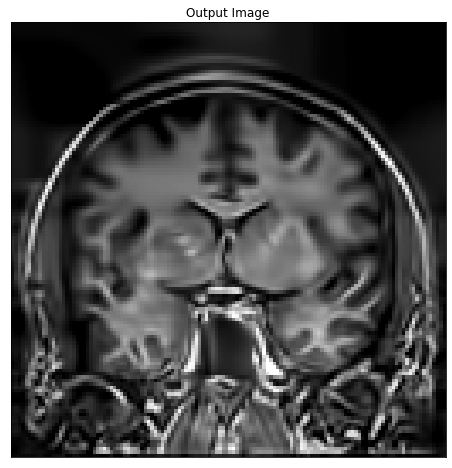

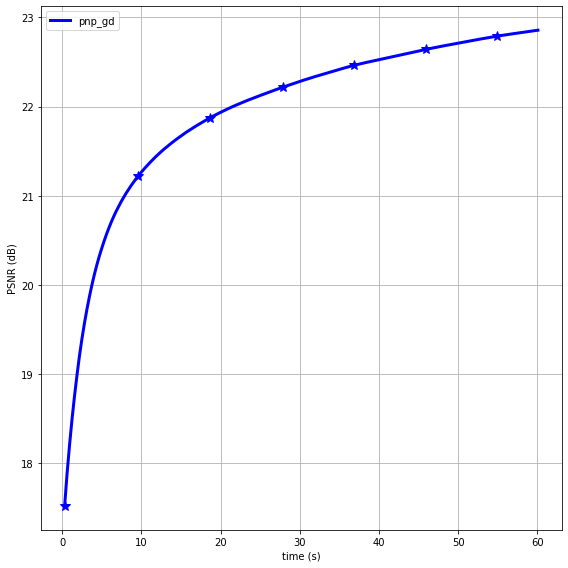

In [9]:
master_psnr_fig = display_results(main_problem, results_gd, save_results=True)

In [13]:
denoiser = BM3DDenoiser(sigma_modifier=0.6)
results_saga = pnp_saga(main_problem, denoiser=denoiser, eta=1e-1, tt=60, mini_batch_size=5000, hist_size=10, verbose=True)

0 Before denoising:  13.732623529439818
0 After denoising:  13.822914972198092
1 Before denoising:  14.362895123611786
1 After denoising:  14.399411384333378
2 Before denoising:  14.705567050754336
2 After denoising:  14.7232756394196
3 Before denoising:  14.898777261815642
3 After denoising:  14.908469635536951
4 Before denoising:  15.143327455659144
4 After denoising:  15.148103287692233
5 Before denoising:  15.352201703847816
5 After denoising:  15.35415851693664
6 Before denoising:  15.71046771745033
6 After denoising:  15.710903571161822
7 Before denoising:  16.200426738691633
7 After denoising:  16.198573097700336
8 Before denoising:  16.049355180372164
8 After denoising:  16.045330766891496
9 Before denoising:  16.647893176178787
9 After denoising:  16.641009965343684
10 Before denoising:  17.003286033698256
10 After denoising:  16.994747214697966
11 Before denoising:  17.096678968227064
11 After denoising:  17.08712348722611
12 Before denoising:  17.336422610217866
12 After den

Output PSNR: 22.9	Change in PSNR: 15.94	Gradient Time: 44.14	Denoising Time: 44.14


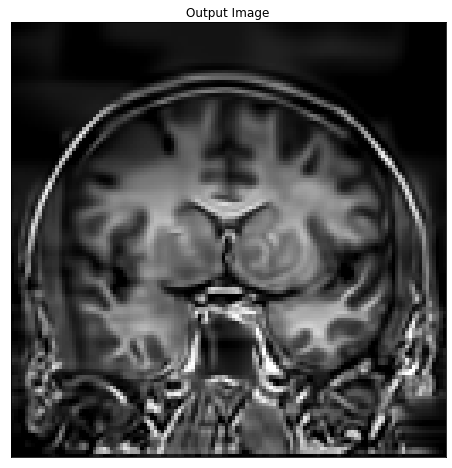

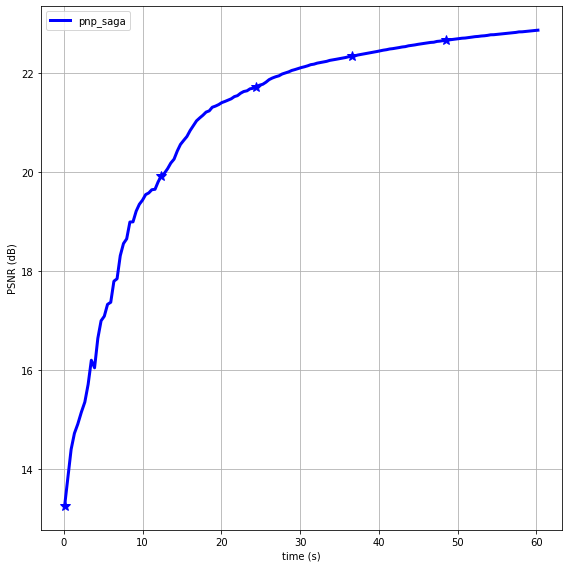

In [14]:
master_psnr_fig = display_results(main_problem, results_saga, save_results=True)

In [15]:
denoiser = BM3DDenoiser(sigma_modifier=0.6)
results_sarah = pnp_sarah(main_problem, denoiser=denoiser, eta=5e-2, tt=60, T2=10, mini_batch_size=1000, verbose=True)

After gradient update: 0 0 13.51064217990161
After denoising update: 0 0 13.60044204641013
After gradient update: 0 1 13.862069029490062
After denoising update: 0 1 13.899042020066334
After gradient update: 0 2 14.1700069008217
After denoising update: 0 2 14.190281815396627
After gradient update: 0 3 14.474811467231767
After denoising update: 0 3 14.486044447313644
After gradient update: 0 4 14.789026417362445
After denoising update: 0 4 14.794802783436669
After gradient update: 0 5 15.11301477528274
After denoising update: 0 5 15.115547668363202
After gradient update: 0 6 15.46281144914831
After denoising update: 0 6 15.46511830057973
After gradient update: 0 7 15.809540736739807
After denoising update: 0 7 15.814789468065264
After gradient update: 0 8 16.103030075679218
After denoising update: 0 8 16.11686780299223
After gradient update: 0 9 16.561675307079746
After denoising update: 0 9 16.594797328020164
After gradient update: 1 0 16.773677218861145
After denoising update: 1 0 16.7

Output PSNR: 22.1	Change in PSNR: 6.82	Gradient Time: 53.08	Denoising Time: 53.08


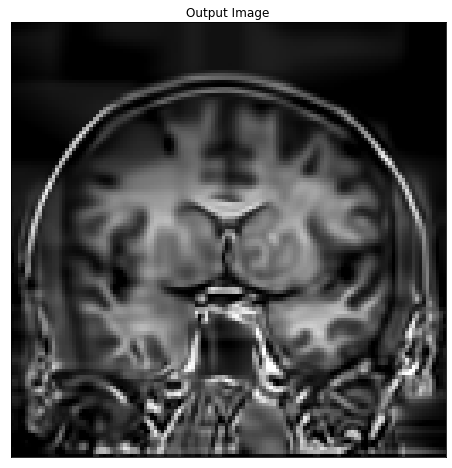

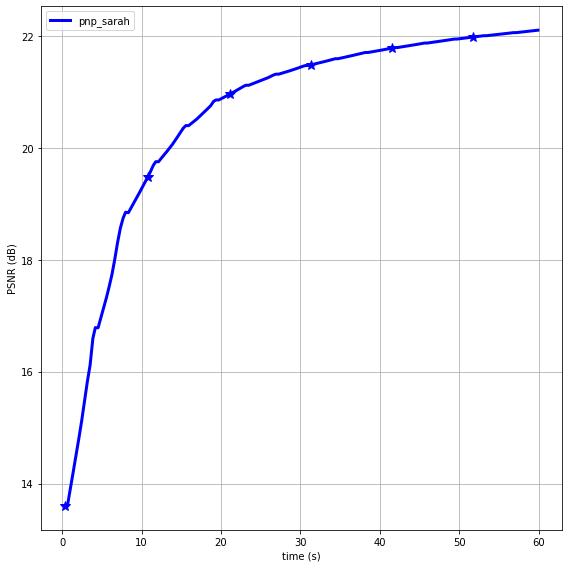

In [16]:
master_psnr_fig = display_results(main_problem, results_sarah, save_results=True)

# Figure 2(a): Compare PSNR over time using NLM

## Figure 2(b): Compare Sampling Ratio for each PnP Algorithm

## Figure 3: Compare Image Denoising Routines with PnP-SVRG using RGB Images